# Projet Olist
Nous sommes une société de consutants pour Olist, une solution de vente sur les marketplaces en ligne.

<img src="Olist.png" style="width:400px;height:400px"/>

Nous fournissons une description actionnable de la segmentation obtenue et proposer une analyse de la stabilité des segments afin d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs.
Pour ce faire, nous utilisons l'analyse RFM: Récence, Fréquence, Montant (provenant de l'histoire des transactions) pour segmenter les clients basés sur leurs comportements.

In [1]:
#importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import QuantileTransformer, quantile_transform

from scipy.cluster.hierarchy import dendrogram

In [2]:
# Importation de la BDD
df = pd.read_csv('base de données V2.csv', encoding="UTF-8",sep=";")
df

C:\Users\tungv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,Unnamed: 39
0,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,15/08/2017 18:29,15/08/2017 20:05,17/08/2017 15:28,18/08/2017 14:44,28/08/2017,1,87285b34884572647811a353c7ac498a,...,13.0,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP,NaN
1,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,02/08/2017 18:24,02/08/2017 18:43,04/08/2017 17:35,07/08/2017 18:30,15/08/2017,1,87285b34884572647811a353c7ac498a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1e7f171b11eff2ba0ffbf95130c2f18a,4d13014c8bb7cd5fe2d9df4ce2a2d200,delivered,28/07/2017 14:08,28/07/2017 14:23,31/07/2017 16:16,03/08/2017 18:23,10/08/2017,1,03b58043df5d7424df7eac2be2511c51,...,30.0,cool_stuff,b13d30b775be852b487f71adb7092a31,5860.0,sao paulo,SP,9350.0,maua,SP,NaN
3,807d573c36fdd71594efae0ca1db554e,b2fd5cda6445986a32221a9a29897f67,delivered,20/07/2017 07:30,20/07/2017 07:42,20/07/2017 14:49,29/07/2017 14:18,23/08/2017,1,03b58043df5d7424df7eac2be2511c51,...,30.0,cool_stuff,996fdddf8cd5bbb99b221fcaf5ba1359,60712.0,fortaleza,CE,9350.0,maua,SP,NaN
4,b7077d240d1449882a2aa143b428b8b2,db41b8d7ff23d40f4002903e0109a136,delivered,19/10/2017 12:50,21/10/2017 03:07,23/10/2017 19:59,03/11/2017 17:04,08/11/2017,1,03b58043df5d7424df7eac2be2511c51,...,30.0,cool_stuff,571fd0fd90da8bbbd90e58bbd11aecc6,81320.0,curitiba,PR,9350.0,maua,SP,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74813,e8fa22c3673b1dd17ea315021b1f0f61,1ff773612ab8934db89fd5afa8afe506,delivered,19/04/2018 13:54,20/04/2018 07:15,24/04/2018 16:08,03/05/2018 16:39,22/05/2018,6,0c9439abe84dc40a64fc164365c4d064,...,11.0,drinks,ef8d54b3797ea4db1d63f0ced6a906e9,20540.0,rio de janeiro,RJ,4104.0,sao paulo,SP,NaN
74814,e8fa22c3673b1dd17ea315021b1f0f61,1ff773612ab8934db89fd5afa8afe506,delivered,19/04/2018 13:54,20/04/2018 07:15,24/04/2018 16:08,03/05/2018 16:39,22/05/2018,7,0c9439abe84dc40a64fc164365c4d064,...,11.0,drinks,ef8d54b3797ea4db1d63f0ced6a906e9,20540.0,rio de janeiro,RJ,4104.0,sao paulo,SP,NaN
74815,e8fa22c3673b1dd17ea315021b1f0f61,1ff773612ab8934db89fd5afa8afe506,delivered,19/04/2018 13:54,20/04/2018 07:15,24/04/2018 16:08,03/05/2018 16:39,22/05/2018,8,0c9439abe84dc40a64fc164365c4d064,...,11.0,drinks,ef8d54b3797ea4db1d63f0ced6a906e9,20540.0,rio de janeiro,RJ,4104.0,sao paulo,SP,NaN
74816,e8fa22c3673b1dd17ea315021b1f0f61,1ff773612ab8934db89fd5afa8afe506,delivered,19/04/2018 13:54,20/04/2018 07:15,24/04/2018 16:08,03/05/2018 16:39,22/05/2018,9,0c9439abe84dc40a64fc164365c4d064,...,11.0,drinks,ef8d54b3797ea4db1d63f0ced6a906e9,20540.0,rio de janeiro,RJ,4104.0,sao paulo,SP,NaN


# Data Cleaning

In [3]:
# Vérifier s'il y a des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       74818 non-null  object 
 1   customer_id                    74818 non-null  object 
 2   order_status                   74818 non-null  object 
 3   order_purchase_timestamp       74818 non-null  object 
 4   order_approved_at              74818 non-null  object 
 5   order_delivered_carrier_date   74818 non-null  object 
 6   order_delivered_customer_date  74818 non-null  object 
 7   order_estimated_delivery_date  74818 non-null  object 
 8   order_item_id                  74818 non-null  int64  
 9   product_id                     74818 non-null  object 
 10  seller_id                      74818 non-null  object 
 11  shipping_limit_date            74818 non-null  object 
 12  price                          74818 non-null 

In [4]:
# Nombre de produits payés par les clients
df["order_id"].value_counts()

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
5a3b1c29a49756e75f1ef513383c0c12    18
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
                                    ..
35a972d7f8436f405b56e36add1a7140     1
409d692c7314744b643ae98e8a11e1b5     1
c73a56b991707be0c940896c7b7dd98c     1
464dcde4a46d816f4943dd22ac477629     1
4a6c7fdefcd879e7b3eca9f4e8186c76     1
Name: order_id, Length: 65122, dtype: int64

In [5]:
# Suppression des colonnes inutiles dans nos traitements
df.drop(["seller_id", "shipping_limit_date",
                       "freight_value"], axis=1, inplace=True)
df.drop(["product_name_lenght", "product_description_lenght",
                    "product_photos_qty", "product_weight_g", 
                    "product_length_cm", "product_height_cm", "product_width_cm"],
                    axis=1, inplace=True)
df.drop(["review_comment_title", "review_comment_message",
                        "review_creation_date", "review_answer_timestamp", "Unnamed: 39"],
                       axis=1, inplace=True)

In [6]:
# Verifions s'il y a des valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       74818 non-null  object 
 1   customer_id                    74818 non-null  object 
 2   order_status                   74818 non-null  object 
 3   order_purchase_timestamp       74818 non-null  object 
 4   order_approved_at              74818 non-null  object 
 5   order_delivered_carrier_date   74818 non-null  object 
 6   order_delivered_customer_date  74818 non-null  object 
 7   order_estimated_delivery_date  74818 non-null  object 
 8   order_item_id                  74818 non-null  int64  
 9   product_id                     74818 non-null  object 
 10  price                          74818 non-null  float64
 11  payment_sequential             74818 non-null  int64  
 12  payment_type                   74818 non-null 

In [7]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
price                               0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
product_category_name_english    3125
customer_unique_id               3125
customer_zip_code_prefix         3125
customer_city                    3125
customer_state                   3125
seller_zip_code_prefix           3125
seller_city                      3125
seller_state                     3125
dtype: int64

In [8]:
# Suppression des valeurs manquantes
df["customer_unique_id"].isna().sum()

3125

In [9]:
df = df[~df["customer_unique_id"].isna()]

In [10]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
price                            0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
product_category_name_english    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [11]:
df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,review_id,review_score,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,15/08/2017 18:29,15/08/2017 20:05,17/08/2017 15:28,18/08/2017 14:44,28/08/2017,1,87285b34884572647811a353c7ac498a,...,b46f1e34512b0f4c74a72398b03ca788,4,housewares,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,9350.0,maua,SP
2,1e7f171b11eff2ba0ffbf95130c2f18a,4d13014c8bb7cd5fe2d9df4ce2a2d200,delivered,28/07/2017 14:08,28/07/2017 14:23,31/07/2017 16:16,03/08/2017 18:23,10/08/2017,1,03b58043df5d7424df7eac2be2511c51,...,4f9f514f8a97cbe104208b04d02cf605,4,cool_stuff,b13d30b775be852b487f71adb7092a31,5860.0,sao paulo,SP,9350.0,maua,SP
3,807d573c36fdd71594efae0ca1db554e,b2fd5cda6445986a32221a9a29897f67,delivered,20/07/2017 07:30,20/07/2017 07:42,20/07/2017 14:49,29/07/2017 14:18,23/08/2017,1,03b58043df5d7424df7eac2be2511c51,...,958787b5cbb6615e90b5215ec191826b,5,cool_stuff,996fdddf8cd5bbb99b221fcaf5ba1359,60712.0,fortaleza,CE,9350.0,maua,SP
4,b7077d240d1449882a2aa143b428b8b2,db41b8d7ff23d40f4002903e0109a136,delivered,19/10/2017 12:50,21/10/2017 03:07,23/10/2017 19:59,03/11/2017 17:04,08/11/2017,1,03b58043df5d7424df7eac2be2511c51,...,6c592f1af0e9d96d4e86efce1ce8b01f,4,cool_stuff,571fd0fd90da8bbbd90e58bbd11aecc6,81320.0,curitiba,PR,9350.0,maua,SP
5,61dc7d82d2eb6ecf4f0ac2a3cd693cfb,eda669d85ef713eb385cf57a584a2b68,delivered,05/11/2017 21:54,05/11/2017 22:06,06/11/2017 19:33,07/11/2017 16:15,17/11/2017,1,03b58043df5d7424df7eac2be2511c51,...,417cbb2f4c9d48d446ebba30f980d076,5,cool_stuff,cb85e26bc7feed69b59cdd1bc1aecb86,4213.0,sao paulo,SP,9350.0,maua,SP
6,4bff39e06ff6b0753c960a52a6b4cf18,1f6708446d3ea27208d14ace89a60d64,delivered,12/07/2017 13:20,12/07/2017 14:10,13/07/2017 16:07,14/07/2017 20:17,25/07/2017,1,03b58043df5d7424df7eac2be2511c51,...,0b1003e8a2557852f99001bd5d1a2d36,4,cool_stuff,7e3f883d573c9e96503c9fc51a3ff25d,5528.0,sao paulo,SP,9350.0,maua,SP
7,81c277d38bfc8beca560a53fac3646f5,1748b9f945e5b64b45417d766da4e07f,delivered,11/09/2017 21:36,11/09/2017 21:50,13/09/2017 15:07,14/09/2017 18:32,21/09/2017,1,6a33f85f66191cc5b645b5f775ca93d9,...,33029e7d12360eb78820a06cf1a7221c,5,sports_leisure,1c707591f8e9763d709df72835e6ba2d,2415.0,sao paulo,SP,9350.0,maua,SP
8,b095ec7b830d94cc7e1b67fed0455c01,85051f9b3e9909676bf77f69a2c05b20,delivered,20/09/2017 11:49,20/09/2017 12:04,21/09/2017 16:59,22/09/2017 16:37,05/10/2017,1,6a33f85f66191cc5b645b5f775ca93d9,...,fd91747d4d8e20048792b0310859782c,4,sports_leisure,dd17d7c53c87783e0f71685dec93b9f3,4011.0,sao paulo,SP,9350.0,maua,SP
9,4ec007fa66327a51919a32d840b49395,37495158e596d9ed20f3a53e8beab81b,delivered,15/10/2017 13:09,15/10/2017 13:26,17/10/2017 16:35,25/10/2017 18:29,03/11/2017,1,a2e23998b013d26d049d721aa7a32e1b,...,630d83ef424ddd42bf268577526cd944,3,furniture_decor,ac7de73e07c456ba7c3280010fd90678,30441.0,belo horizonte,MG,9350.0,maua,SP
10,27bef9e280946001761b32ae6463dbe0,226f45581c1b5fe6ab7ac0d9e060a2c4,delivered,10/08/2017 15:28,10/08/2017 15:43,11/08/2017 13:52,14/08/2017 20:47,23/08/2017,1,a2e23998b013d26d049d721aa7a32e1b,...,65107a79b503715226e500d00366f89c,3,furniture_decor,39791463fe4660b0d147813e963801e4,4747.0,sao paulo,SP,9350.0,maua,SP


In [12]:
df.shape

(71693, 25)

# SEGMENTATION RFM


In [13]:
# Distribution de clients par ville en Brazil
distribution = df[['customer_city', 'customer_unique_id']].\
                groupby(['customer_city']).\
                agg({'customer_unique_id': lambda x: x.nunique()}).\
                reset_index().sort_values('customer_unique_id',
                                          ascending=False)

distribution.rename(columns={'customer_unique_id': 'nombre clients'},
                    inplace=True)
distribution.head()

,customer_city,nombre clients
3127,sao paulo,9694
2742,rio de janeiro,4109
390,belo horizonte,1719
476,brasilia,1361
999,curitiba,970


In [14]:
# Nombre de clients
distribution['nombre clients'].sum()

61089

In [15]:
# Verifier s'il n'y a pas de valeurs négatives sur les prix
df.price.min()

0.85

In [16]:
# Compter le nombre de valeurs uniques
def unique_counts(df):
    """ Returns the unique number of value per variable. """
    for i in df.columns:
        count = df[i].nunique()
        print("%s : %d" % (i, count))


unique_counts(df)

order_id : 62488
customer_id : 62488
order_status : 2
order_purchase_timestamp : 57985
order_approved_at : 36937
order_delivered_carrier_date : 44436
order_delivered_customer_date : 52876
order_estimated_delivery_date : 439
order_item_id : 21
product_id : 21885
price : 4670
payment_sequential : 5
payment_type : 4
payment_installments : 23
payment_value : 26049
review_id : 62498
review_score : 5
product_category_name_english : 69
customer_unique_id : 61043
customer_zip_code_prefix : 13367
customer_city : 3576
customer_state : 27
seller_zip_code_prefix : 1740
seller_city : 494
seller_state : 21


In [17]:
# Changer le Type de "order_purchase_timestamp" en datetime
df["order_purchase_timestamp"] = pd.\
    to_datetime(df["order_purchase_timestamp"])

<ipython-input-17-5e6b82314e95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_purchase_timestamp"] = pd.\


In [18]:
# Rechercher la date la plus ancienne
ancien = df["order_purchase_timestamp"].min()
ancien

Timestamp('2016-03-10 09:44:00')

In [19]:
# Rechercher la date la plus récente
recent = df["order_purchase_timestamp"].max()
recent

Timestamp('2018-12-08 23:58:00')

In [20]:
import datetime as dt
aammjj = str.split(str.split(str(recent))[0], "-")
NOW = dt.datetime(int(aammjj[0]), int(aammjj[1]), int(aammjj[2]) + 1)

In [21]:
# RFM table

# Recence: nombre de jours écoulés depuis la dernière date d'achat
# Frequence: nombre de fois que le client a acheté des produits
# Montant: le montant total dépensé par le client

rfmTable = df.groupby('customer_unique_id').\
            agg({"order_purchase_timestamp": lambda x: (NOW - x.max()).days,
                 "order_id": lambda x: x.nunique(),
                 "price": lambda x: sum(x)})

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'recency',
                         'order_id': 'frequency',
                         'price': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,64,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,156,1,18.90
0000f46a3911fa3c0805444483337064,431,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,363,1,25.99
0004aac84e0df4da2b147fca70cf8255,389,1,180.00


In [22]:
# Quartile
quartiles = rfmTable.quantile(q=[0.25, 0.5, 0.75])  
print(quartiles)

      recency  frequency  monetary_value
0.25    190.0        1.0            45.9
0.50    311.0        1.0            87.0
0.75    461.0        1.0           155.0


In [23]:
quartiles = quartiles.to_dict()    # Transformation de dataframe à dictionnaire
quartiles

{'recency': {0.25: 190.0, 0.5: 311.0, 0.75: 461.0},
 'frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'monetary_value': {0.25: 45.9, 0.5: 87.0, 0.75: 155.0}}

In [24]:
segmented_rfm = rfmTable.copy()

In [25]:
def RScore(x, p, d):
    """Returns the recent score for a value relative to quartile value"""
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


def FMScore(x, p, d):
    """
        Returns the frequency and monetary score
        to quartile value
    """
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [26]:
#  La Table RFM avec les scores
segmented_rfm['r_quartile'] = segmented_rfm['recency'].\
    apply(RScore, args=('recency', quartiles))

segmented_rfm['f_quartile'] = segmented_rfm['frequency'].\
    apply(FMScore, args=('frequency', quartiles))

segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].\
    apply(FMScore, args=('monetary_value', quartiles))

segmented_rfm['RFMScore'] = (segmented_rfm["r_quartile"].astype(str) + "-").\
                    str.cat(segmented_rfm["f_quartile"].astype(str) + "-").\
                    str.cat(segmented_rfm["m_quartile"].astype(str))

segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
customer_unique_id,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,64,1,129.90,1,4,2,1-4-2
0000b849f77a49e4a4ce2b2a4ca5be3f,156,1,18.90,1,4,4,1-4-4
0000f46a3911fa3c0805444483337064,431,1,69.00,3,4,3,3-4-3
0000f6ccb0745a6a4b88665a16c9f078,363,1,25.99,3,4,4,3-4-4
0004aac84e0df4da2b147fca70cf8255,389,1,180.00,3,4,1,3-4-1


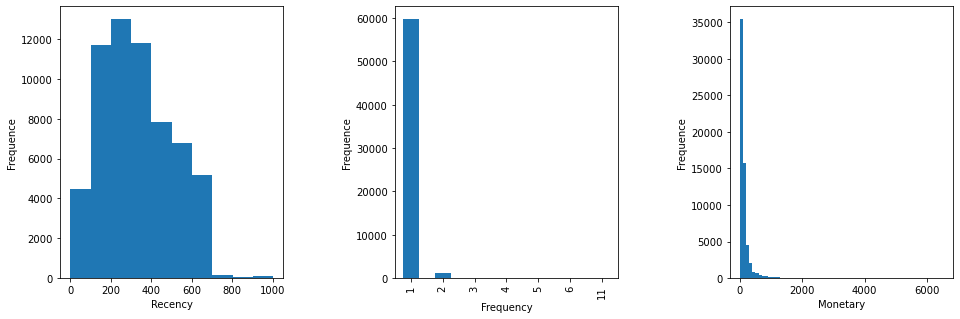

In [27]:
# Graphiques
def compute_histogram_bins(data, desired_bin_size):
    min_val = np.min(data)
    max_val = np.max(data)
    min_boundary = -1.0 * (min_val % desired_bin_size - min_val)
    max_boundary = max_val - max_val % desired_bin_size + desired_bin_size
    n_bins = int((max_boundary - min_boundary) / desired_bin_size) + 1
    bins = np.linspace(min_boundary, max_boundary, n_bins)
    return bins


r = segmented_rfm['recency']
m = segmented_rfm['monetary_value']

plt.figure(figsize=(16, 5))
plt.subplots_adjust(wspace=0.5)

# Recency
plt.subplot(131)
plt.xlabel('Recency')
plt.ylabel('Frequence')
counts, bins = np.histogram(r)
plt.hist(bins[:-1], bins, weights=counts)

# Frequency
plt.subplot(132)
plt.xlabel('Frequency')
plt.ylabel('Frequence')
segmented_rfm['frequency'].value_counts().plot(kind="bar", width=0.5)

# Monetary
plt.subplot(133)
plt.xlabel('Monetary')
plt.ylabel('Frequence')
bins = compute_histogram_bins(m, 100)
plt.hist(m, bins=bins)

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x212ce1f20a0>,
 'caps': [<matplotlib.lines.Line2D at 0x212ce1f2760>,
 'boxes': [<matplotlib.lines.Line2D at 0x212ce1ddd00>],
 'medians': [<matplotlib.lines.Line2D at 0x212ce1f2e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x212ce1eb1c0>],
 'means': []}

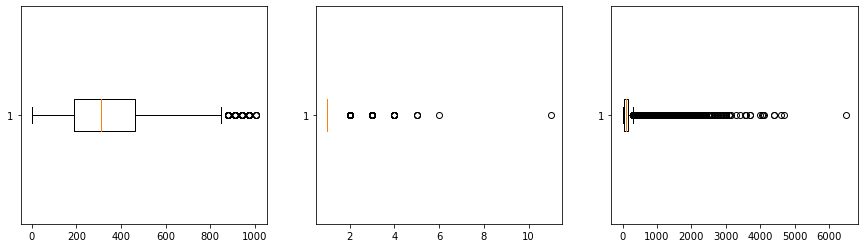

In [28]:
fig = plt.figure(figsize=(15, 4))

ax = fig.add_subplot(131)
ax.boxplot(segmented_rfm["recency"], vert=False)

ax = fig.add_subplot(132)
ax.boxplot(segmented_rfm["frequency"], vert=False)

ax = fig.add_subplot(133)
ax.boxplot(segmented_rfm["monetary_value"], vert=False)

In [29]:
segmented_rfm['RFMScore'].unique()

array(['1-4-2', '1-4-4', '3-4-3', '3-4-4', '3-4-1', '2-4-2', '2-4-4',
       '2-4-1', '4-4-2', '2-4-3', '4-4-1', '1-4-3', '3-4-2', '4-4-4',
       '1-4-1', '4-4-3', '3-1-1', '4-1-1', '1-1-2', '1-1-4', '3-1-3',
       '2-1-1', '2-1-4', '1-1-1', '4-1-3', '1-1-3', '2-1-2', '2-1-3',
       '4-1-2', '3-1-2', '4-1-4', '3-1-4'], dtype=object)

In [30]:
mean_var = segmented_rfm.groupby("RFMScore")[
    ["recency", "frequency", "monetary_value"]].\
    agg([np.mean, np.var])

mean_var["size"] = segmented_rfm.groupby('RFMScore')[['recency']].\
    agg([np.size])

mean_var

recency              frequency           monetary_value  \
                mean          var      mean       var           mean   
RFMScore                                                               
1-1-1     108.630522  2940.782290  2.208835  0.585244     435.103896   
1-1-2     114.348837  3139.359234  2.011628  0.011628     120.475930   
1-1-3     121.680000  2943.201633  2.040000  0.039184      66.162600   
1-1-4     113.666667   913.750000  2.000000  0.000000      33.224444   
1-4-1     117.522282  2776.941227  1.000000  0.000000     365.450128   
1-4-2     118.380103  2693.536280  1.000000  0.000000     116.967530   
1-4-3     117.551070  2534.020901  1.000000  0.000000      64.366310   
1-4-4     118.129400  2665.729045  1.000000  0.000000      28.768737   
2-1-1     252.694444  1307.336543  2.103175  0.116803     366.458294   
2-1-2     252.934211  1076.675614  2.052632  0.050526     121.617237   
2-1-3     247.194444  1078.103968  2.027778  0.027778      66.408889   
2-1-4     246.700000   932.455556  2.000000  0.000000      33.239000   
2-4-1     251.261229  1176.811564  1.000000  0.000000     349.368283   
2-4-2     252.422546  1139.214377  1.000000  0.000000     117.707670   
2-4-3     252.803576  1127.353006  1.000000  0.000000      64.535985   
2-4-4     253.261416  1175.147179  1.000000  0.000000      28.502108   
3-1-1     381.803828  1562.639216  2.100478  0.129279     397.921675   
3-1-2     380.126582  1592.317105  2.025316  0.024992     120.098608   
3-1-3     391.526316  1659.985775  2.026316  0.026316      66.691842   
3-1-4     394.100000  1746.766667  2.000000  0.000000      33.092000   
3-4-1     380.449083  1776.954588  1.000000  0.000000     336.935707   
3-4-2     380.014167  1751.873375  1.000000  0.000000     116.057697   
3-4-3     380.780916  1755.348020  1.000000  0.000000      64.089723   
3-4-4     379.999481  1761.126848  1.000000  0.000000      28.376066   
4-1-1     545.787234  4076.482979  2.063830  0.060182     390.107518   
4-1-2     554.238095  3982.576074  2.047619  0.046458     124.589524   
4-1-3     544.461538  4508.658462  2.038462  0.038462      70.059615   
4-1-4     531.400000  2678.044444  2.000000  0.000000      35.078000   
4-4-1     577.451210  5947.357529  1.000000  0.000000     361.091196   
4-4-2     575.827784  5941.661024  1.000000  0.000000     115.228128   
4-4-3     571.573637  5756.516726  1.000000  0.000000      63.983684   
4-4-4     574.490942  5550.363884  1.000000  0.000000      28.592264   

                         size  
                    var        
RFMScore                       
1-1-1     186032.677915   249  
1-1-2        405.106935    86  
1-1-3        116.496326    50  
1-1-4         73.558603     9  
1-4-1     126280.551662  3523  
1-4-2        369.557664  3870  
1-4-3        139.738119  3691  
1-4-4         95.539395  3864  
2-1-1      63228.682283   252  
2-1-2        344.762236    76  
2-1-3        124.837067    36  
2-1-4         51.294143    10  
2-4-1     103516.681568  3629  
2-4-2        388.905780  3841  
2-4-3        144.985689  3691  
2-4-4         98.581317  3657  
3-1-1     116553.583998   209  
3-1-2        368.565371    79  
3-1-3        158.988469    38  
3-1-4        110.094840    10  
3-4-1      80123.889873  3545  
3-4-2        401.742368  3600  
3-4-3        138.607475  3930  
3-4-4         98.716912  3856  
4-1-1      91052.410915   141  
4-1-2        319.944697    42  
4-1-3        157.151980    26  
4-1-4         59.133196    10  
4-4-1     127441.542252  3679  
4-4-2        377.454953  3664  
4-4-3        128.479686  3816  
4-4-4        101.292880  3864

In [31]:
# Table RFM
# Recency X frequency, Recency X Monetary_value, Frequency X Monetary_value
RF = pd.DataFrame(columns=['1', '2', '3', '4'])
RM = pd.DataFrame(columns=['1', '2', '3', '4'])
FM = pd.DataFrame(columns=['1', '2', '3', '4'])
size = segmented_rfm.shape[0]
for i in range(1, 5):
    row_crf = []
    row_crm = []
    row_cfm = []
    for j in range(1, 5):
        crf = 0
        crm = 0
        cfm = 0
        for k, row in segmented_rfm.iterrows():
            if row["r_quartile"] == i and row["f_quartile"] == j:
                crf += 1
            if row["r_quartile"] == i and row["m_quartile"] == j:
                crm += 1
            if row["f_quartile"] == i and row["m_quartile"] == j:
                cfm += 1
        row_crf.append(crf)
        row_crm.append(crm)
        row_cfm.append(cfm)
    RF.loc[i] = row_crf
    RM.loc[i] = row_crm
    FM.loc[i] = row_cfm

In [32]:
RF.style.set_caption("Recency X Frequency")
RF

,1,2,3,4
1,394,0,0,14948
2,374,0,0,14818
3,336,0,0,14931
4,219,0,0,15023


In [33]:
RM.style.set_caption("Recency X Monetary")
RM

,1,2,3,4
1,3772,3956,3741,3873
2,3881,3917,3727,3667
3,3754,3679,3968,3866
4,3820,3706,3842,3874


In [34]:
FM.style.set_caption("frequency X Monetary")
FM

,1,2,3,4
1,851,283,150,39
2,0,0,0,0
3,0,0,0,0
4,14376,14975,15128,15241


In [35]:
# Construire la table de segmentation clients
# Nommer les segments par les notes RFM
customer_segment = pd.DataFrame()
segment = ["les meilleurs clients", "les clients loyaux", "les grands dépensiers", "les presque perdus",
           "les clients perdus", "les clients bon marché", "Autres"
          ]
rfm = ["1-1-1", "X-1-X", "X-X-1", "3-1-1", "4-1-1", "4-4-4", "Autres"]
# Ajouter les commentaires et conseils
description = ["Les clients qui ont acheté le plus récemment, le plus souvent \
               et qui dépensent le plus.",
               "Les clients ayant acheté le plus récemment",
               "Les clients qui dépensent le plus",
               "N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment \
               et ont dépensé le plus.",
               "N'ont pas acheté depuis longtemps, mais ont acheté fréquemment et ont \
               dépensé le plus.",
               "Dernier achat il y a longtemps, acheté peu et dépensé peu.",
               ""
              ]
marketing = ["Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité",
             "Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.",
             "Commercialisez vos produits les plus chers.",
             "Offrez d'autres produits pertinents et des rabais spéciaux.",
             "Incitations à des prix agressifs",
             "Ne passez pas trop de temps à essayer de vous ré-acquérir.",
             "Ajuster les intervales pour le réduire si important"
            ]
customer_segment["rfm"] = rfm
customer_segment["segments clients"] = segment 

In [36]:
# Calculer le nombre contenu dans chaque segments - deux types de notes X1X et XX1 
sums = []
X1X = ["1-1-2", "1-1-3", "1-1-4", "2-1-1", "2-1-2", "2-1-3", "2-1-4"]
XX1 = ["1-2-1", "1-3-1", "1-4-1", "2-2-1", "2-3-1", "2-4-1"]
for r in rfm:
    count = 0
    if r == "X-1-X":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] in X1X:
                count += 1
        sums.append(count)
    if r == "X-X-1":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] in XX1 and r != "2-1-1":
                count += 1
        sums.append(count)
    if r != "X-1-X" and r != "X-X-1" and r != "Autres":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] == r:
                count += 1
        sums.append(count)
    if r == "Autres":
        for j, row in segmented_rfm.iterrows():
            if row["RFMScore"] not in rfm and row["RFMScore"] not in X1X and \
            row["RFMScore"] not in XX1:
                count += 1
        sums.append(count)
        
customer_segment["nombre de clients"] = sums

In [37]:
customer_segment["activité"] = description
customer_segment["Conseil d'action"] = marketing

# Motre le table de Customer/segment
pd.set_option('display.max_colwidth', None)
customer_segment

,rfm,segments clients,nombre de clients,activité,Conseil d'action
0,1-1-1,les meilleurs clients,249,"Les clients qui ont acheté le plus récemment, le plus souvent et qui dépensent le plus.","Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité"
1,X-1-X,les clients loyaux,519,Les clients ayant acheté le plus récemment,Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.
2,X-X-1,les grands dépensiers,7152,Les clients qui dépensent le plus,Commercialisez vos produits les plus chers.
3,3-1-1,les presque perdus,209,"N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment et ont dépensé le plus.",Offrez d'autres produits pertinents et des rabais spéciaux.
4,4-1-1,les clients perdus,141,"N'ont pas acheté depuis longtemps, mais ont acheté fréquemment et ont dépensé le plus.",Incitations à des prix agressifs
5,4-4-4,les clients bon marché,3864,"Dernier achat il y a longtemps, acheté peu et dépensé peu.",Ne passez pas trop de temps à essayer de vous ré-acquérir.
6,Autres,Autres,48909,,Ajuster les intervales pour le réduire si important


In [38]:
# Créer une table de segmentation clients version finale
customer_segment_ = pd.DataFrame()
segment_ = ["les meilleurs clients", "les clients loyaux", "les clients prommeteurs", "les grands dépensiers",
            "les presque perdus", "les clients perdus", "les clients bon marché", "Autres"
           ]
description_ = ["Les clients qui ont acheté le plus récemment, le plus souvent \
                et qui dépensent le plus.",
                "Les clients ayant acheté le plus récemment",
                "Des acheteurs récents, mais qui n'ont pas beaucoup dépensé",
                "Les clients qui dépensent le plus",
                "N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment \
                et ont dépensé le plus.",
                "N'ont pas acheté depuis longtemps, mais ont acheté fréquemment \
                et ont dépensé le plus.",
                "Dernier achat il y a longtemps, acheté peu et dépensé peu.",
                ""
               ]
marketing_ = ["Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité",
              "Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.",
              "offrir des essais gratuits",
              "Commercialisez vos produits les plus chers.",
              "Offrez d'autres produits pertinents et des rabais spéciaux.",
              "Incitations à des prix agressifs",
              "Ne passez pas trop de temps à essayer de vous ré-acquérir.",
              "Ajuster les intervales pour le réduire si important"
             ]
customer_segment_["segment"] = segment_

In [39]:
# Calculer le nombre contenu dans chaque segments 
recents_ = []
def countCustomerSegment(segmented_rfmp):
    """Main function is to return the customer identities for each segment"""
    seg_cus_id = {"les meilleurs clients": [], "les clients loyaux": [], "les clients prommeteurs": [],
                  "les grands dépensiers": [],"les presque perdus": [], "les clients perdus": [],
                  "les clients bon marché": [], "Autres": []}
    sums_ = []
    best = ["1-1-1"]
    X1X_ = ["1-1-2", "1-1-3", "1-1-4", "2-1-1", "2-1-2", "2-1-3", "2-1-4", "1-4-2", "2-4-2"]
    promiss = ["1-4-3", "1-4-4", "2-4-3", "2-4-4"]
    XX1_ = ["1-2-1", "1-3-1", "1-4-1", "2-3-1", "2-4-1"]
    almost_lost = ["3-1-1", "3-4-1", "3-4-2"]
    lost = ["3-4-3", "3-4-4", "4-1-1", "4-4-1", "4-4-2"]
    lost_cheap = ["4-4-4", "4-4-3"]
    for s in segment_:
        count = 0
        rec = 0
        if s == "les meilleurs clients":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in best:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "les clients loyaux":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in X1X_:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "les clients prommeteurs":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in promiss:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "les grands dépensiers":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in XX1_:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "les presque perdus":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in almost_lost:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "les clients perdus":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in lost:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "les clients bon marché":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] in lost_cheap:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
        if s == "Autres":
            for j, row in segmented_rfmp.iterrows():
                if row["RFMScore"] not in best and row["RFMScore"] not in X1X_ \
                and row["RFMScore"] not in XX1_ and row["RFMScore"] not in promiss and \
                row["RFMScore"] not in lost and row["RFMScore"] not in almost_lost and \
                row["RFMScore"] not in lost_cheap:
                    count += 1
                    rec += row["recency"]
                    seg_cus_id[s].append(j)
                    
        sums_.append(count)
        recents_.append(int(rec/count))
        
    return (seg_cus_id,sums_)

In [40]:
# Compléter le table de segmentation clients
cus_id, customer_segment_["nombre de clients"] = countCustomerSegment(segmented_rfm)
customer_segment_["description"] = description_
customer_segment_["marketing"] = marketing_

#customer/segment
customer_segment_

,segment,nombre de clients,description,marketing
0,les meilleurs clients,249,"Les clients qui ont acheté le plus récemment, le plus souvent et qui dépensent le plus.","Pas d'incitation aux prix, Nouveaux produits et programmes de fidélité"
1,les clients loyaux,8230,Les clients ayant acheté le plus récemment,Vendre des produits de plus grande valeur. Demandez des commentaires. Engagez-les.
2,les clients prommeteurs,14903,"Des acheteurs récents, mais qui n'ont pas beaucoup dépensé",offrir des essais gratuits
3,les grands dépensiers,7152,Les clients qui dépensent le plus,Commercialisez vos produits les plus chers.
4,les presque perdus,7354,"N'ont pas acheté depuis un certain temps, mais ont acheté fréquemment et ont dépensé le plus.",Offrez d'autres produits pertinents et des rabais spéciaux.
5,les clients perdus,15270,"N'ont pas acheté depuis longtemps, mais ont acheté fréquemment et ont dépensé le plus.",Incitations à des prix agressifs
6,les clients bon marché,7680,"Dernier achat il y a longtemps, acheté peu et dépensé peu.",Ne passez pas trop de temps à essayer de vous ré-acquérir.
7,Autres,205,,Ajuster les intervales pour le réduire si important


Text(0, 0.5, 'Nombre de clients par segments')

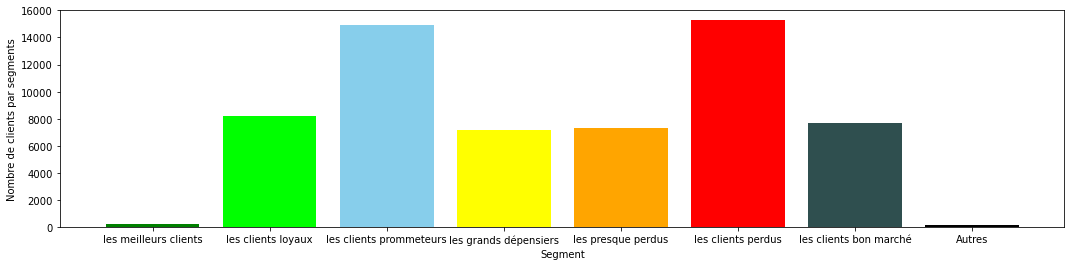

In [41]:
# Nombre de clients par segments en graphiques barres
plt.figure(figsize=(18, 4))
plt.bar(customer_segment_["segment"], customer_segment_["nombre de clients"], align='center',
        color=["green", "lime", "#87ceeb", "yellow", "orange", "red", "#2F4F4F", "black"]
       )
plt.xlabel('Segment')
plt.ylabel('Nombre de clients par segments')

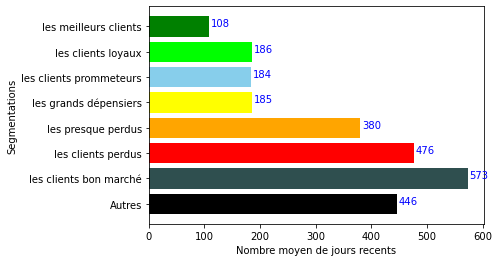

In [42]:
# Nombre de clients par segments en graphiques barres horizontales
fig, ax = plt.subplots() 
ax.barh(customer_segment_["segment"].iloc[::-1] , recents_[::-1],
        color=["black", "#2F4F4F", "red", "orange", "yellow","#87ceeb", "lime", "green"]
       )
plt.xlabel('Nombre moyen de jours recents')
plt.ylabel('Segmentations')
for i, v in enumerate(recents_[::-1]):
    ax.text(v + 3, i + .0, str(v), color='blue')

In [43]:
# Construire le graphique de la table de surlignage
XRFM = segmented_rfm[["recency", "frequency", "monetary_value"]].copy()
segments_labels = []
for i, row in XRFM.iterrows():
    if i in cus_id["les meilleurs clients"]:
        segments_labels.append("les meilleurs clients")
        continue
    if i in cus_id["les clients loyaux"]:
        segments_labels.append("les clients loyaux")
        continue
    if i in cus_id["les clients prommeteurs"]:
        segments_labels.append("les clients prommeteurs")
        continue
    if i in cus_id["les grands dépensiers"]:
        segments_labels.append("les grands dépensiers")
        continue
    if i in cus_id["les presque perdus"]:
        segments_labels.append("les presque perdus")
        continue
    if i in cus_id["les clients perdus"]:
        segments_labels.append("les clients perdus")
        continue
    if i in cus_id["les clients bon marché"]:
        segments_labels.append("les clients bon marché")
        continue
    if i in cus_id["Autres"]:
        segments_labels.append("Autres")
        continue

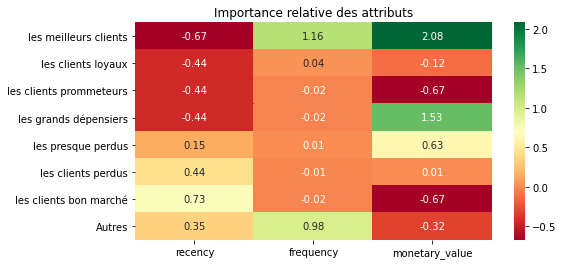

In [44]:
relative_imp_sort = pd.DataFrame()
XRFM["segment_appartenance"] = segments_labels

population = segmented_rfm[["recency", "frequency", "monetary_value"]].copy()
population_avg = population.mean()

cluster_avg = XRFM.groupby(['segment_appartenance']).mean()
relative_imp = cluster_avg / population_avg - 1

relative_imp_sort["les meilleurs clients"] = relative_imp.loc["les meilleurs clients"]
relative_imp_sort["les clients loyaux"] = relative_imp.loc["les clients loyaux"]
relative_imp_sort["les clients prommeteurs"] = relative_imp.loc["les clients prommeteurs"]
relative_imp_sort["les grands dépensiers"] = relative_imp.loc["les grands dépensiers"]
relative_imp_sort["les presque perdus"] = relative_imp.loc["les presque perdus"]
relative_imp_sort["les clients perdus"] = relative_imp.loc["les clients perdus"]
relative_imp_sort["les clients bon marché"] = relative_imp.loc["les clients bon marché"]
relative_imp_sort["Autres"] = relative_imp.loc["Autres"]

plt.figure(figsize=(8, 4))
ax = sns.heatmap(data=relative_imp_sort.T, annot=True, fmt='.2f', cmap='RdYlGn')
ax.set_ylim(len(relative_imp), 0)
plt.title('Importance relative des attributs')
plt.show()